<a href="https://colab.research.google.com/github/LucasEduardo08/Projeto-Data-Science/blob/main/TAESA_TimeSerie_Teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p>Os dados foram tirados nas datas 12/05/2021 até 12/05/2023, ou seja um intervalo de 2 anos.<p>

# Usando Série Temporal na ação da TAESA




In [ ]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime 
from sklearn.preprocessing import StandardScaler

## Carregando os dados

In [ ]:
# carregando o dataset
taesa_dataset = pd.read_csv('Taesa TAEE11 - Histórico  InfoMoney.csv')
taesa_dataset.head()

,DATA,ABERTURA,FECHAMENTO,VARIAÇÃO,MÍNIMO,MÁXIMO,VOLUME
0,12/05/2023,"37,01","37,19","0,32","36,74","37,42","167,58M"
1,11/05/2023,"36,42","37,07","1,42","36,14","37,24","176,78M"
2,10/05/2023,"35,99","36,55","0,83","35,90","36,68","125,02M"
3,09/05/2023,"36,12","36,25","0,58","35,83","36,51","97,28M"
4,08/05/2023,"36,00","36,04","0,31","35,79","36,17","50,44M"


In [ ]:
# Vendo as informações do dataset
taesa_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATA        500 non-null    object
 1   ABERTURA    500 non-null    object
 2   FECHAMENTO  500 non-null    object
 3   VARIAÇÃO    500 non-null    object
 4   MÍNIMO      500 non-null    object
 5   MÁXIMO      500 non-null    object
 6   VOLUME      500 non-null    object
dtypes: object(7)
memory usage: 27.5+ KB


<p>A função info() fala que não tem valores nulos, de fato. Entretando pode haver dados que não representem a informação que a a coluna quer passar. Além disso, os tipos das colunas não são o adequado.<p>

In [ ]:
# Verificando a forma do dataset
taesa_dataset.shape

(500, 7)

## Tratando os valores inconsistentes.

In [ ]:
# Verificando se existe inconsistência nos dados
aber = taesa_dataset['ABERTURA'].value_counts()['n/d']
print(aber)

5


In [ ]:
# Retirando o valor inconsistente e convertenddo a coluna
taesa_dataset.replace('n/d', np.nan, inplace=True)
taesa_dataset['ABERTURA'] = taesa_dataset['ABERTURA'].str.replace(',', '.').astype(float).to_numpy()

In [ ]:
# Verificando as informações
taesa_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATA        500 non-null    object 
 1   ABERTURA    495 non-null    float64
 2   FECHAMENTO  500 non-null    object 
 3   VARIAÇÃO    500 non-null    object 
 4   MÍNIMO      500 non-null    object 
 5   MÁXIMO      500 non-null    object 
 6   VOLUME      500 non-null    object 
dtypes: float64(1), object(6)
memory usage: 27.5+ KB


<p>Agora será feita o mesmo caminho para as outras colunas.<p>

In [ ]:
# Coluna Fechamento
taesa_dataset['FECHAMENTO'] = taesa_dataset['FECHAMENTO'].str.replace(',', '.').astype(float).to_numpy()

In [ ]:
# Coluna Variação
taesa_dataset['VARIAÇÃO'] = taesa_dataset['VARIAÇÃO'].str.replace(',', '.').astype(float).to_numpy()

# Coluna Mínimo
taesa_dataset['MÍNIMO'] = taesa_dataset['MÍNIMO'].str.replace(',', '.').astype(float).to_numpy()

# Coluna Máximo
taesa_dataset['MÁXIMO'] = taesa_dataset['MÁXIMO'].str.replace(',', '.').astype(float).to_numpy()

In [ ]:
# Verificando as informações
taesa_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATA        500 non-null    object 
 1   ABERTURA    495 non-null    float64
 2   FECHAMENTO  500 non-null    float64
 3   VARIAÇÃO    500 non-null    float64
 4   MÍNIMO      500 non-null    float64
 5   MÁXIMO      500 non-null    float64
 6   VOLUME      500 non-null    object 
dtypes: float64(5), object(2)
memory usage: 27.5+ KB


<p>Os 5 valores 'n/d' da coluna ABERTURA foram substituidos por NaN do numpy. Ou seja, pode ser tratado adequadamente agora e para isso vamos usar a média dos valores para substituir.<p>

In [ ]:
# Verificando se tem dados NaN
taesa_dataset.isna().sum()

DATA          0
ABERTURA      5
FECHAMENTO    0
VARIAÇÃO      0
MÍNIMO        0
MÁXIMO        0
VOLUME        0
dtype: int64

In [ ]:
# Pegando a média da coluna ABERTURA
mean_abertura = taesa_dataset['ABERTURA'].mean()
mean_abertura

34.4069898989899

In [ ]:
# Substituindo os valores NaN pela média
taesa_dataset['ABERTURA'].fillna(mean_abertura, inplace=True)

In [ ]:
# Verificando se tem valores NaN
taesa_dataset.isna().sum()

DATA          0
ABERTURA      0
FECHAMENTO    0
VARIAÇÃO      0
MÍNIMO        0
MÁXIMO        0
VOLUME        0
dtype: int64

## Análise Exploratória

<p>Agora vamos explorar mais os dados usando algumas visualizações e aqui vamos transformar a coluna DATA em ìndice, afinal uma série temporal tem as datas como íncides.<p>

<p>O gráfico a seguir é o candlestick, ele é bastante usado para visualização das ações no mercado financeiro e ele é um famoso gráfico de velas e cada vela mostra x quantidades de variáveis usadas e uma cor da vela caso foi bem ou não a ação.<p>

In [ ]:
# Utilizando o candlestick 
fig = go.Figure(data=[go.Candlestick(x=taesa_dataset['DATA'], 
                                     open=taesa_dataset['ABERTURA'], 
                                     high=taesa_dataset['MÁXIMO'], 
                                     low=taesa_dataset['MÍNIMO'], 
                                     close=taesa_dataset['FECHAMENTO'])])

# Exibindo
fig.show()

<p>Agora vamos visualizar a variação da ação ao longo do tempo.<p>

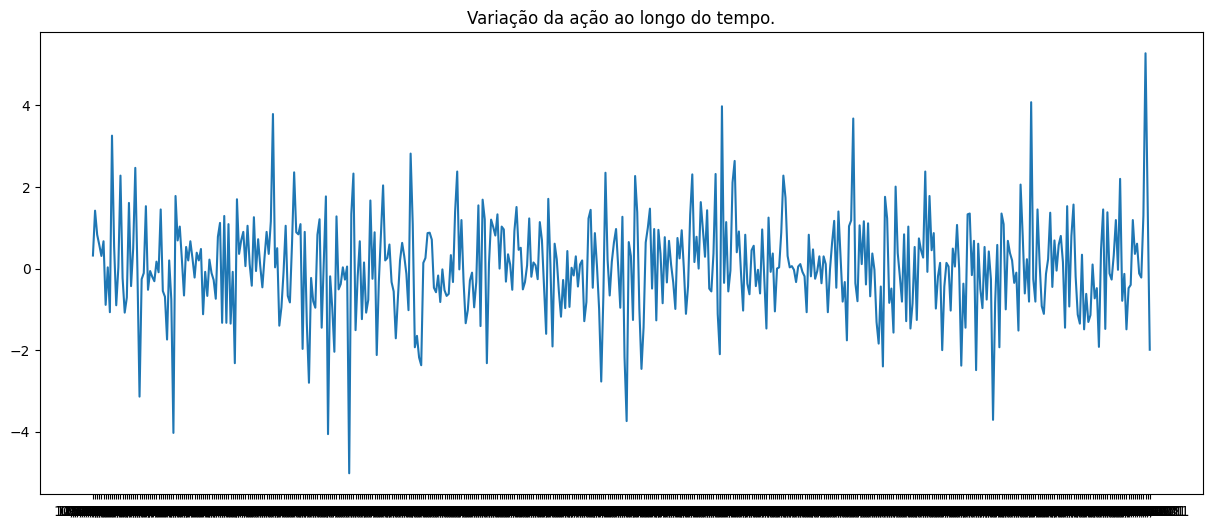

In [ ]:
# Tamanho da imagem
plt.figure(figsize=(15,6))

# Passando o dataset com DATA e VARIAÇÂO
plt.plot(taesa_dataset['DATA'], taesa_dataset['VARIAÇÃO'])

# Títulos
plt.title('Variação da ação ao longo do tempo.')
plt.show()

<p>Visualizar as datas fica difícil, mas desse gráfico dá pra tirar bastante informação como a tendência, decomposição e entre outros.<p>

In [ ]:
# Verificando a correlação
taesa_dataset.corr()

<ipython-input-15-9577e8541922>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  taesa_dataset.corr()


,ABERTURA,FECHAMENTO,VARIAÇÃO,MÍNIMO,MÁXIMO
ABERTURA,1.000000,0.984359,-0.070024,0.990644,0.990279
FECHAMENTO,0.984359,1.000000,0.066786,0.995929,0.995587
VARIAÇÃO,-0.070024,0.066786,1.000000,0.005630,0.001320
MÍNIMO,0.990644,0.995929,0.005630,1.000000,0.995415
MÁXIMO,0.990279,0.995587,0.001320,0.995415,1.000000


<p>Para o projeto vai ser utilizado a coluna FECHAMENTO como variável alvo porque é mais usual, claro que pode ser escohida outras colunas dependendo da análise feita e do objetivo. Além disso, pela correlação vamos usar as colunas ABERTURA, MÍNIMO e MÁXIMO como variáveis preditoras. <p>

### Transformando em uma serie

<p>Uma Série Temporal geralmente tem uma coluna que é a variável que queremos analisar ou prever e os índices são as datas. Porém, vamos usar 3 colunas para prever os valores de fechamento da ação.<p>

In [ ]:
# Convertendo o dataframe em uma série temporal
serie_temporal_taesa = taesa_dataset.set_index('DATA')[['ABERTURA', 'MÍNIMO', 'MÁXIMO', 'FECHAMENTO']]
serie_temporal_taesa.head()

,ABERTURA,MÍNIMO,MÁXIMO,FECHAMENTO
DATA,,,,
12/05/2023,37.01,36.74,37.42,37.19
11/05/2023,36.42,36.14,37.24,37.07
10/05/2023,35.99,35.90,36.68,36.55
09/05/2023,36.12,35.83,36.51,36.25
08/05/2023,36.00,35.79,36.17,36.04


In [ ]:
# Verificando as informações
serie_temporal_taesa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 12/05/2023 to 12/05/2021
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ABERTURA    500 non-null    float64
 1   MÍNIMO      500 non-null    float64
 2   MÁXIMO      500 non-null    float64
 3   FECHAMENTO  500 non-null    float64
dtypes: float64(4)
memory usage: 19.5+ KB


<p>Só para testarmos vamos pegar o valor de fechamento dos dias 12/05/2022 e 08/05/2023.<p>

In [ ]:
serie_temporal_taesa.loc['12/05/2022'][3]

36.94

In [ ]:
serie_temporal_taesa.loc['08/05/2023'][3]

36.04

## Dados de treino

<p>Agora vamos definir os dados de teste e treino, sendo que 80% será para treino (400 registros) e 20% para teste (100 registros).<p>

In [ ]:
# Queremos que 80% dos dados para treino
proporcao_treino = 0.8
ponto_divisao = int(proporcao_treino * len(serie_temporal_taesa))

# Dividindo os dados em treino e teste
dados_treino = serie_temporal_taesa.iloc[:ponto_divisao]
dados_teste = serie_temporal_taesa.iloc[ponto_divisao:]

# Visualizando o tamanho
len(dados_treino), len(dados_teste)

(400, 100)

In [ ]:
# Visualizando a forma
dados_treino.shape, dados_teste.shape

((400, 4), (100, 4))

In [ ]:
# Dividindo as variáveis em x(preditoras) e y(alvos) 
x_treino, y_treino = dados_treino.iloc[:, 0:3], dados_treino.iloc[:, 3]
x_teste, y_teste = dados_teste.iloc[:, 0:3], dados_teste.iloc[:, 3]

In [ ]:
# Verificando as formas
x_treino.shape, y_treino.shape

((400, 3), (400,))

In [ ]:
x_teste.shape, y_teste.shape

((100, 3), (100,))

In [ ]:
#  Transformando em um array
x_treino, y_treino = np.array(x_treino), np.array(y_treino)
x_teste, y_teste = np.array(x_teste), np.array(y_teste)


In [ ]:
x_treino[:5], y_treino[:5]

(array([[37.01, 36.74, 37.42],
        [36.42, 36.14, 37.24],
        [35.99, 35.9 , 36.68],
        [36.12, 35.83, 36.51],
        [36.  , 35.79, 36.17]]),
 array([37.19, 37.07, 36.55, 36.25, 36.04]))

In [ ]:
x_teste[:5], y_teste[:5]

(array([[29.92, 29.65, 29.95],
        [30.42, 29.62, 30.71],
        [30.42, 30.23, 30.91],
        [30.31, 30.19, 30.66],
        [30.38, 30.26, 30.73]]),
 array([29.67, 29.62, 30.23, 30.36, 30.32]))

In [ ]:
x_treino.shape

(400, 3)

## Escalonando os dados


In [ ]:
# Objeto de escalonamento para x_treino
scaler_x = StandardScaler()
x_treino_scaler = scaler_x.fit_transform(x_treino)

# Objeto de escalonamento para x_teste
scaler_teste = StandardScaler()
x_teste_scaler = scaler_teste.fit_transform(x_teste)

# Objeto de escalonamento para y_treino
scaler_y = StandardScaler()
y_treino_scaler = scaler_y.fit_transform(y_treino.reshape(-1, 1))

# Objeto de escalonamento para y_teste
scaler_y_teste = StandardScaler()
y_teste_scaler = scaler_y_teste.fit_transform(y_teste.reshape(-1, 1))


In [ ]:
# Verificando as formas
x_treino_scaler.shape, y_treino_scaler.shape

((400, 3), (400, 1))

In [ ]:
x_teste_scaler.shape, y_teste_scaler.shape

((100, 3), (100, 1))

## Construindo o modelo LSTM

In [ ]:
# importando as bibliotecas
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [ ]:
# Criando o modelo
modelo_serie_temporal = Sequential()

# Camadas LSMT
modelo_serie_temporal.add(LSTM(50, return_sequences=True, input_shape=(x_treino_scaler.shape[1], 1)))
modelo_serie_temporal.add(LSTM(50, return_sequences=False))

# Camadas Dense
modelo_serie_temporal.add(Dense(25))
modelo_serie_temporal.add(Dense(1))


In [ ]:
# importando
from tensorflow.keras.losses import mean_squared_error

# Defina a função de perda
loss_function = mean_squared_error

# Linha para a otimização e erro do modelo
modelo_serie_temporal.compile(optimizer='adam', loss=loss_function)

In [ ]:
# Treinamento do modelo
modelo_serie_temporal.fit(x_treino_scaler, y_treino_scaler , batch_size=32, epochs=20)

Epoch 1/20
13/13 [==============================] - 5s 7ms/step - loss: 0.8580
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 0.3444
Epoch 3/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0508
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0311
Epoch 5/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0192
Epoch 6/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0161
Epoch 7/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0159
Epoch 8/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0150
Epoch 9/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0150
Epoch 10/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0149
Epoch 11/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0148
Epoch 12/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0151
Epoch 13/20
13/13 [==============================

## Testando o modelo com os dados de teste

In [ ]:
previsao = modelo_serie_temporal.predict(x_teste_scaler)
print(previsao)

4/4 [==============================] - 1s 5ms/step
[[-1.898495  ]
 [-1.5863863 ]
 [-1.3577633 ]
 [-1.4606675 ]
 [-1.3962324 ]
 [-1.3126731 ]
 [-1.2741671 ]
 [-1.2654366 ]
 [-1.4924784 ]
 [-2.168299  ]
 [-1.1928747 ]
 [-0.86091006]
 [-0.4682265 ]
 [-0.63001055]
 [-0.89383626]
 [-0.93624926]
 [-1.2596387 ]
 [-0.85369235]
 [-0.6959952 ]
 [-0.44668603]
 [-0.35535872]
 [-0.25273964]
 [-0.23680158]
 [-0.5036687 ]
 [ 0.92245   ]
 [ 0.38793308]
 [ 0.97971183]
 [ 1.13373   ]
 [ 1.3152447 ]
 [ 0.99948406]
 [ 0.8057586 ]
 [ 1.0586733 ]
 [ 0.88158303]
 [ 0.78313154]
 [ 0.735486  ]
 [ 0.9626767 ]
 [ 0.92696315]
 [ 1.2671318 ]
 [ 0.90201664]
 [ 0.65272367]
 [ 0.6780367 ]
 [ 0.6743349 ]
 [ 0.7302951 ]
 [-0.04034972]
 [-0.4504077 ]
 [-0.17253815]
 [-0.3633661 ]
 [-0.5933955 ]
 [-0.3924078 ]
 [-0.03696898]
 [ 0.18443187]
 [ 0.07397236]
 [-0.1945576 ]
 [-0.27836773]
 [-0.39919552]
 [-0.46447718]
 [-0.4888058 ]
 [-0.83040345]
 [-0.7602125 ]
 [ 0.6598129 ]
 [-0.8412174 ]
 [-0.80639225]
 [-0.8238105 ]
 [-1

In [ ]:
previsao.shape

(100, 1)

In [ ]:
# Revertendo os dados padronizados para os originais
previsao_descaler = previsao[:] * scaler_y_teste.scale_ + scaler_y_teste.mean_
previsao_descaler

array([[29.87885159],
       [30.19289247],
       [30.42293089],
       [30.31938962],
       [30.38422365],
       [30.46830024],
       [30.50704466],
       [30.51582912],
       [30.2873818 ],
       [29.60737725],
       [30.58884032],
       [30.92286011],
       [31.31797475],
       [31.1551891 ],
       [30.88973006],
       [30.84705449],
       [30.521663  ],
       [30.9301225 ],
       [31.08879593],
       [31.33964857],
       [31.43154128],
       [31.53479567],
       [31.5508324 ],
       [31.2823131 ],
       [32.71726083],
       [32.17943474],
       [32.77487716],
       [32.9298489 ],
       [33.11248726],
       [32.7947718 ],
       [32.59984699],
       [32.85432744],
       [32.67614085],
       [32.57707985],
       [32.52913931],
       [32.75773657],
       [32.72180192],
       [33.06407653],
       [32.69670096],
       [32.44586464],
       [32.47133437],
       [32.46760964],
       [32.52391633],
       [31.74850048],
       [31.33590384],
       [31

In [ ]:
previsao_descaler.shape

(100, 1)

In [ ]:
print(y_teste)

[29.67 29.62 30.23 30.36 30.32 30.3  30.62 30.47 30.45 30.13 30.13 30.86
 30.98 31.43 31.02 30.61 30.66 30.45 31.23 31.04 31.19 31.5  31.34 31.57
 31.44 31.53 32.74 33.01 32.82 33.47 33.02 32.67 33.   32.77 32.65 32.58
 32.7  32.73 33.24 32.57 32.3  32.5  32.43 32.69 31.41 31.49 31.75 31.29
 31.25 31.54 31.9  31.94 31.86 31.43 31.57 31.36 31.38 31.19 30.95 30.9
 31.35 30.88 31.17 30.92 30.44 30.5  30.85 31.27 31.16 31.63 31.83 32.25
 32.62 32.59 32.83 32.99 33.63 33.48 33.   33.49 33.04 33.08 33.17 33.06
 32.67 32.68 31.98 32.24 32.28 32.76 32.92 33.05 32.67 32.55 32.35 32.39
 32.46 32.05 30.44 29.94]


In [ ]:
print(previsao_descaler.reshape(1, -1))

[[29.87885159 30.19289247 30.42293089 30.31938962 30.38422365 30.46830024
  30.50704466 30.51582912 30.2873818  29.60737725 30.58884032 30.92286011
  31.31797475 31.1551891  30.88973006 30.84705449 30.521663   30.9301225
  31.08879593 31.33964857 31.43154128 31.53479567 31.5508324  31.2823131
  32.71726083 32.17943474 32.77487716 32.9298489  33.11248726 32.7947718
  32.59984699 32.85432744 32.67614085 32.57707985 32.52913931 32.75773657
  32.72180192 33.06407653 32.69670096 32.44586464 32.47133437 32.46760964
  32.52391633 31.74850048 31.33590384 31.61549368 31.42348433 31.19203086
  31.39426283 31.75190214 31.97467367 31.86353032 31.5933379  31.50900892
  31.38743309 31.32174727 31.29726804 30.95355558 31.0241811  32.45299778
  30.94267468 30.97771543 30.96018933 30.56954944 30.40542698 30.65181386
  31.06880929 31.21947426 31.45972731 31.86756667 32.09443438 32.35825518
  32.71269426 32.83709677 32.89718713 33.31986032 33.34734337 33.07529484
  33.5159509  33.14380287 32.9731969  33.

In [ ]:
y_teste.shape, previsao_descaler.shape

((100,), (100, 1))

In [ ]:
# Para comparar melhor os resultados
for i in range(100):
  print(f"Valor correto: {y_teste[i]} e valor previsto: {previsao_descaler[i]}")

Valor correto: 29.67 e valor previsto: [29.87885159]
Valor correto: 29.62 e valor previsto: [30.19289247]
Valor correto: 30.23 e valor previsto: [30.42293089]
Valor correto: 30.36 e valor previsto: [30.31938962]
Valor correto: 30.32 e valor previsto: [30.38422365]
Valor correto: 30.3 e valor previsto: [30.46830024]
Valor correto: 30.62 e valor previsto: [30.50704466]
Valor correto: 30.47 e valor previsto: [30.51582912]
Valor correto: 30.45 e valor previsto: [30.2873818]
Valor correto: 30.13 e valor previsto: [29.60737725]
Valor correto: 30.13 e valor previsto: [30.58884032]
Valor correto: 30.86 e valor previsto: [30.92286011]
Valor correto: 30.98 e valor previsto: [31.31797475]
Valor correto: 31.43 e valor previsto: [31.1551891]
Valor correto: 31.02 e valor previsto: [30.88973006]
Valor correto: 30.61 e valor previsto: [30.84705449]
Valor correto: 30.66 e valor previsto: [30.521663]
Valor correto: 30.45 e valor previsto: [30.9301225]
Valor correto: 31.23 e valor previsto: [31.08879593]

In [ ]:
# Calculando o mean_square_error 
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculando os erros
mse = mean_squared_error(y_teste, previsao_descaler)
mae = mean_absolute_error(y_teste, previsao_descaler)

# exibindo o mse
mse, mae

(0.11694745068074573, 0.2438310824174338)

<p>O modelo obteve um erro médio absoluto de 0.24 e um erro médio quadrático de 0.1146, pelos valores é possível dizer que teve bons resultados.<p>


# Testando com novos dados

<p>Os novos dados consiste dos dias 15/05/2023 até o dia 26/05/23.<p>

In [ ]:
# Carregando os dados
novos_dados = pd.read_csv('TAEE11novosdados.csv')
novos_dados

,DATA,ABERTURA,FECHAMENTO,VARIAÇÃO,MÍNIMO,MÁXIMO,VOLUME
0,26/05/2023,"37,74","37,68","0,16","37,41","37,93","99,83M"
1,25/05/2023,"37,55","37,62","0,78","37,35","37,79","132,62M"
2,24/05/2023,"37,25","37,33","0,21","37,02","37,50","148,62M"
3,23/05/2023,"37,10","37,25","0,46","37,10","37,32","151,28M"
4,22/05/2023,"37,08","37,08","0,00","37,01","37,62","79,25M"
5,19/05/2023,"37,21","37,08","-0,22","37,06","37,82","184,97M"
6,18/05/2023,"37,09","37,16","0,19","37,01","37,50","98,70M"
7,17/05/2023,"37,00","37,09","0,19","36,97","37,31","105,04M"
8,16/05/2023,"37,01","37,02","-0,40","36,84","37,38","99,12M"
9,15/05/2023,"37,22","37,17","-0,05","36,92","37,33","40,67M"


In [ ]:
# Trocando a vírgula pelo ponto
novos_dados['ABERTURA'] = novos_dados['ABERTURA'].str.replace(',', '.').astype(float).to_numpy()
novos_dados['FECHAMENTO'] = novos_dados['FECHAMENTO'].str.replace(',', '.').astype(float).to_numpy()
novos_dados['VARIAÇÃO'] = novos_dados['VARIAÇÃO'].str.replace(',', '.').astype(float).to_numpy()
novos_dados['MÍNIMO'] = novos_dados['MÍNIMO'].str.replace(',', '.').astype(float).to_numpy()
novos_dados['MÁXIMO'] = novos_dados['MÁXIMO'].str.replace(',', '.').astype(float).to_numpy()

# Visualizando
novos_dados

,DATA,ABERTURA,FECHAMENTO,VARIAÇÃO,MÍNIMO,MÁXIMO,VOLUME
0,26/05/2023,37.74,37.68,0.16,37.41,37.93,"99,83M"
1,25/05/2023,37.55,37.62,0.78,37.35,37.79,"132,62M"
2,24/05/2023,37.25,37.33,0.21,37.02,37.50,"148,62M"
3,23/05/2023,37.10,37.25,0.46,37.10,37.32,"151,28M"
4,22/05/2023,37.08,37.08,0.00,37.01,37.62,"79,25M"
5,19/05/2023,37.21,37.08,-0.22,37.06,37.82,"184,97M"
6,18/05/2023,37.09,37.16,0.19,37.01,37.50,"98,70M"
7,17/05/2023,37.00,37.09,0.19,36.97,37.31,"105,04M"
8,16/05/2023,37.01,37.02,-0.40,36.84,37.38,"99,12M"
9,15/05/2023,37.22,37.17,-0.05,36.92,37.33,"40,67M"


<p>Para prever os novos valores precisamos transformar os dados do jeito que foi feito para o treinamento.<p>

In [ ]:
# Convertendo o dataframe em uma série temporal
serie_temporal_novos_dados = novos_dados.set_index('DATA')[['ABERTURA', 'MÍNIMO', 'MÁXIMO', 'FECHAMENTO']]
serie_temporal_novos_dados

,ABERTURA,MÍNIMO,MÁXIMO,FECHAMENTO
DATA,,,,
26/05/2023,37.74,37.41,37.93,37.68
25/05/2023,37.55,37.35,37.79,37.62
24/05/2023,37.25,37.02,37.50,37.33
23/05/2023,37.10,37.10,37.32,37.25
22/05/2023,37.08,37.01,37.62,37.08
19/05/2023,37.21,37.06,37.82,37.08
18/05/2023,37.09,37.01,37.50,37.16
17/05/2023,37.00,36.97,37.31,37.09
16/05/2023,37.01,36.84,37.38,37.02


In [ ]:
# Separando os dados que vão pro teste da variável alvo
novos_dados_teste, novos_dados_resposta = serie_temporal_novos_dados.iloc[:, 0:3], serie_temporal_novos_dados.iloc[:, 3]

In [ ]:
# Transformando em um array
novos_dados_teste, novos_dados_resposta = np.array(novos_dados_teste), np.array(novos_dados_resposta)

# Visualizando
novos_dados_teste, novos_dados_resposta

(array([[37.74, 37.41, 37.93],
        [37.55, 37.35, 37.79],
        [37.25, 37.02, 37.5 ],
        [37.1 , 37.1 , 37.32],
        [37.08, 37.01, 37.62],
        [37.21, 37.06, 37.82],
        [37.09, 37.01, 37.5 ],
        [37.  , 36.97, 37.31],
        [37.01, 36.84, 37.38],
        [37.22, 36.92, 37.33]]),
 array([37.68, 37.62, 37.33, 37.25, 37.08, 37.08, 37.16, 37.09, 37.02,
        37.17]))

In [ ]:
# Padronizando os dados
novos_dados_teste_scaler = scaler_x.transform(novos_dados_teste)
novos_dados_teste_scaler

array([[1.0072155 , 1.00466676, 0.93624435],
       [0.93665464, 0.98218638, 0.88478822],
       [0.82524275, 0.85854431, 0.77820051],
       [0.7695368 , 0.88851814, 0.71204262],
       [0.76210934, 0.85479758, 0.82230577],
       [0.81038783, 0.87353123, 0.89581453],
       [0.76582307, 0.85479758, 0.77820051],
       [0.73239951, 0.83981066, 0.70836719],
       [0.73611324, 0.79110318, 0.73409525],
       [0.81410156, 0.82107702, 0.71571806]])

In [ ]:
# Prevendo os valores
previsao_novos_dados = modelo_serie_temporal.predict(novos_dados_teste_scaler)
previsao_novos_dados

1/1 [==============================] - 0s 97ms/step


array([[1.0007789 ],
       [0.95366055],
       [0.8458311 ],
       [0.8188017 ],
       [0.8234732 ],
       [0.86400974],
       [0.8175908 ],
       [0.7854008 ],
       [0.7756915 ],
       [0.8178912 ]], dtype=float32)

In [ ]:
# Despadronizando os dados previstos
previsao_novos_dados_descaler = previsao_novos_dados[:] * scaler_y.scale_ + scaler_y.mean_
previsao_novos_dados_descaler

array([[37.71236368],
       [37.58487288],
       [37.29311268],
       [37.21997772],
       [37.2326177 ],
       [37.34229965],
       [37.21670125],
       [37.12960305],
       [37.10333206],
       [37.21751408]])

In [ ]:
# Comparando 
for i in range(10):
  print(f'Valor correto: {previsao_novos_dados_descaler[i]} e valor previsto: {novos_dados_respostas[i]}')

Valor correto: [37.71236368] e valor previsto: 37.68
Valor correto: [37.58487288] e valor previsto: 37.62
Valor correto: [37.29311268] e valor previsto: 37.33
Valor correto: [37.21997772] e valor previsto: 37.25
Valor correto: [37.2326177] e valor previsto: 37.08
Valor correto: [37.34229965] e valor previsto: 37.08
Valor correto: [37.21670125] e valor previsto: 37.16
Valor correto: [37.12960305] e valor previsto: 37.09
Valor correto: [37.10333206] e valor previsto: 37.02
Valor correto: [37.21751408] e valor previsto: 37.17


<p><p>